# 1: Introduction

In [1]:
# Notebook Introduction
print("Welcome to the Image Captioning Project!")
print("This notebook builds a deep learning-based image captioning system using the Flickr30k dataset.")
print("Steps: Visualization, Preprocessing, Feature Extraction, Modeling, and Inference.")

Welcome to the Image Captioning Project!
This notebook builds a deep learning-based image captioning system using the Flickr30k dataset.
Steps: Visualization, Preprocessing, Feature Extraction, Modeling, and Inference.


# 2: Load Dataset

In [2]:
import pandas as pd
import os

# Define dataset paths
images_path = '/kaggle/input/images/flickr30k_images/flickr30k_images/flickr30k_images/'  # Path to images
csv_path = '/kaggle/input/images/flickr30k_images/results.csv'  # Path to captions CSV

# Load captions CSV
df = pd.read_csv(csv_path, delimiter='|')  # Assuming "|" as delimiter
df.columns = ['image_name', 'caption_number', 'caption']  # Rename columns

# Display dataset sample
print("Dataset Sample:")
print(df.head())

# Extract image paths and captions
image_paths = [os.path.join(images_path, img) for img in df['image_name']]
captions = df['caption'].tolist()

# Ensure paths exist
assert all(os.path.exists(img) for img in image_paths[:10]), "Some image paths are invalid."

Dataset Sample:
       image_name caption_number  \
0  1000092795.jpg              0   
1  1000092795.jpg              1   
2  1000092795.jpg              2   
3  1000092795.jpg              3   
4  1000092795.jpg              4   

                                             caption  
0   Two young guys with shaggy hair look at their...  
1   Two young , White males are outside near many...  
2   Two men in green shirts are standing in a yard .  
3       A man in a blue shirt standing in a garden .  
4            Two friends enjoy time spent together .  


# 3: Visualization

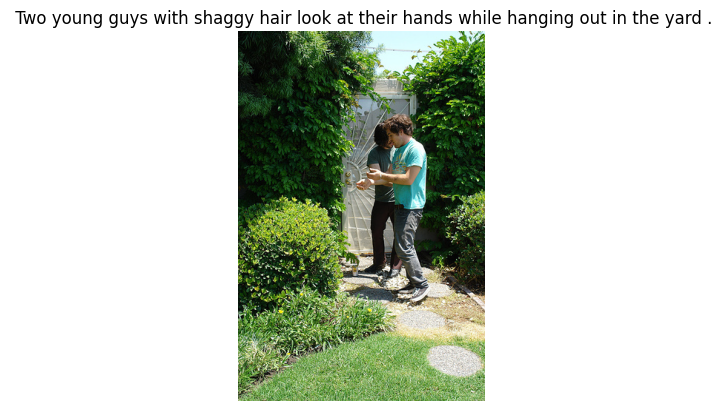

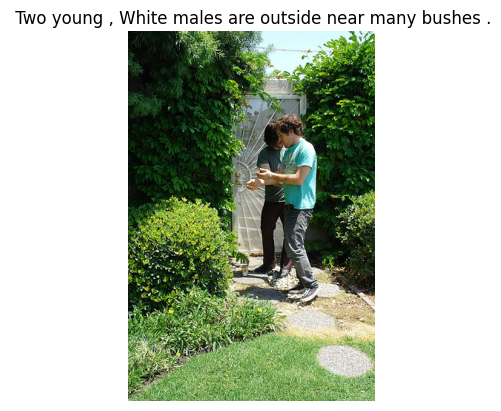

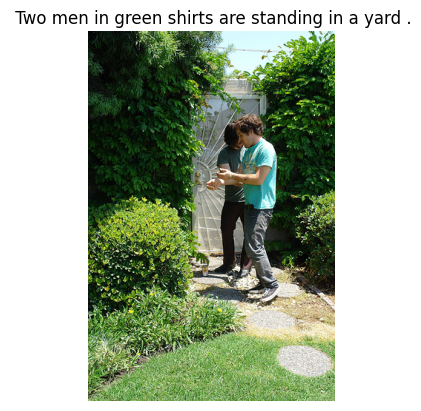

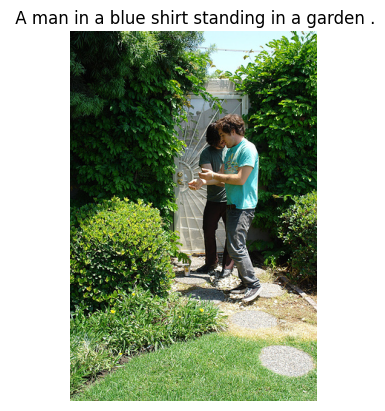

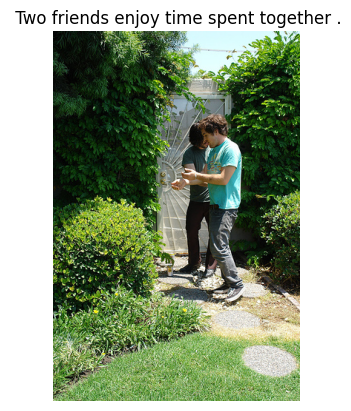

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

def visualize_samples(image_paths, captions, num_samples=5):
    for i in range(num_samples):
        img = Image.open(image_paths[i])
        plt.imshow(img)
        plt.title(captions[i])
        plt.axis('off')
        plt.show()

visualize_samples(image_paths, captions)

# 4: Caption Text Preprocessing

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Replace NaN with an empty string and ensure captions are strings
df['caption'] = df['caption'].fillna('').astype(str)

# Add <start> and <end> tokens to captions
df['caption'] = df['caption'].apply(lambda x: f"<start> {x.strip()} <end>")

# Display sample captions
print("Sample captions after adding tokens:")
print(df['caption'].head())

# Reinitialize tokenizer with adjusted filters to include < and >
tokenizer = Tokenizer(num_words=5000, oov_token='<UNK>', filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(df['caption'])

# Tokenize captions
sequences = tokenizer.texts_to_sequences(df['caption'])
word_index = tokenizer.word_index

# Vocabulary size and max caption length
vocab_size = len(word_index) + 1
max_length = max(len(seq) for seq in sequences)

# Validate presence of <start> and <end>
assert '<start>' in word_index, "Error: '<start>' token not in tokenizer vocabulary!"
assert '<end>' in word_index, "Error: '<end>' token not in tokenizer vocabulary!"

print("Vocabulary Size:", vocab_size)
print("Max Caption Length:", max_length)
print("<start> token index:", word_index['<start>'])
print("<end> token index:", word_index['<end>'])

Sample captions after adding tokens:
0    <start> Two young guys with shaggy hair look a...
1    <start> Two young , White males are outside ne...
2    <start> Two men in green shirts are standing i...
3    <start> A man in a blue shirt standing in a ga...
4    <start> Two friends enjoy time spent together ...
Name: caption, dtype: object
Vocabulary Size: 18316
Max Caption Length: 80
<start> token index: 3
<end> token index: 4


# 5: Image Feature Extraction

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

def extract_features(image_paths, model, limit=100):
    features = {}
    for path in image_paths[:limit]:
        img = load_img(path, target_size=(299, 299))
        img_array = preprocess_input(img_to_array(img)[None, ...])
        features[os.path.basename(path)] = model.predict(img_array)
    return features

image_features = extract_features(image_paths, model)
print(f"Feature Extraction Complete. Extracted features for {len(image_features)} images.")

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━

# 6: Data Generator

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical

def create_dataset(image_features, captions, tokenizer, max_length, batch_size=32):
    """
    Create a tf.data.Dataset for training.
    :param image_features: dict, precomputed image feature vectors
    :param captions: list of str, preprocessed captions
    :param tokenizer: keras Tokenizer, tokenizer fitted on captions
    :param max_length: int, maximum caption length
    :param batch_size: int, batch size for training
    :return: tf.data.Dataset
    """
    def generator():
        for i in range(len(captions)):
            image_name = os.path.basename(image_paths[i])
            image_feature = image_features[image_name]
            seq = tokenizer.texts_to_sequences([captions[i]])[0]
            for k in range(1, len(seq)):
                X_image = image_feature
                X_seq = seq[:k]
                y = seq[k]
                yield ([X_image, X_seq], y)
    
    # Define output signature
    output_signature = (
        (
            tf.TensorSpec(shape=(2048,), dtype=tf.float32),  # Image feature shape
            tf.TensorSpec(shape=(None,), dtype=tf.int32),    # Caption sequence shape
        ),
        tf.TensorSpec(shape=(), dtype=tf.int32)             # Target word shape
    )
    
    # Create a tf.data.Dataset
    dataset = tf.data.Dataset.from_generator(generator, output_signature=output_signature)

    # Batch and pad the sequences
    def prepare_batch(inputs, target):
        image_feature, sequence = inputs

        # Pad sequence using tf.pad
        sequence = tf.pad(
            sequence,
            paddings=[[0, max_length - tf.shape(sequence)[0]]],
            constant_values=0,  # Padding value
        )

        # One-hot encode the target
        target = tf.one_hot(target, depth=vocab_size)

        # Return as a tuple
        return ((image_feature, sequence), target)

    dataset = dataset.map(prepare_batch).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Create the dataset
train_dataset = create_dataset(image_features, captions, tokenizer, max_length, batch_size=32)

# Train the model
model.fit(train_dataset, epochs=10)


Epoch 1/10


ValueError: Layer "inception_v3" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'data:0' shape=(None, 2048) dtype=float32>, <tf.Tensor 'data_1:0' shape=(None, None) dtype=int32>]

# 7: Model Architecture

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Add, Lambda

def build_caption_model(vocab_size, max_length, embedding_dim=256, units=256):
    # Encoder
    image_input = Input(shape=(2048,), name="image_input")
    image_features = Dense(units, activation='relu', name="dense_features")(image_input)
    image_features = Dropout(0.5, name="dropout_features")(image_features)
    
    # Decoder
    caption_input = Input(shape=(max_length,), name="caption_input")
    embedding = Embedding(vocab_size, embedding_dim, mask_zero=True, name="embedding")(caption_input)
    lstm = LSTM(units, return_sequences=True, name="lstm")(embedding)
    
    # Calculate mean of the embedding using a Lambda layer
    mean_embedding = Lambda(lambda x: tf.reduce_mean(x, axis=1), name="mean_embedding")(embedding)
    
    # Combine features
    combined_features = Add(name="add_features")([image_features, mean_embedding])
    outputs = Dense(vocab_size, activation='softmax', name="output")(combined_features)

    # Build and compile model
    model = tf.keras.Model(inputs=[image_input, caption_input], outputs=outputs, name="caption_model")
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

# Create the model
model = build_caption_model(vocab_size, max_length)
model.summary()

# 8: Training

In [ ]:
# Define batch size
batch_size = 32

# Initialize the generator
train_generator = data_generator(image_features, captions, tokenizer, max_length, batch_size)

# Train the model
model.fit(train_generator, steps_per_epoch=len(captions) // batch_size, epochs=10)

# 9: Caption Generation (Inference)

In [7]:
def generate_caption(model, tokenizer, image_feature, max_length):
    input_seq = [tokenizer.word_index['<start>']]
    for _ in range(max_length):
        sequence = pad_sequences([input_seq], maxlen=max_length, padding='post')
        y_pred = model.predict([image_feature, sequence], verbose=0)
        predicted_id = np.argmax(y_pred[0])
        if tokenizer.index_word[predicted_id] == '<end>':
            break
        input_seq.append(predicted_id)
    return ' '.join([tokenizer.index_word[idx] for idx in input_seq[1:] if idx in tokenizer.index_word])